# This notebook demonstrates how to load in the lens catalogues and make some summary plots

In [1]:
"""
This notebook requires a conda environment, which can be set up with the following (also outlined in README):

conda create --name ssl-legacysurvey python=3.8 matplotlib numpy ipykernel h5py pandas

conda activate ssl-legacysurvey

python -m ipykernel install --user --name ssl-legacysurvey --display-name ssl-legacysurvey
"""

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.patheffects as PathEffects

import pandas as pd
import h5py
import os

from pathlib import Path

import src.data_loader as data_loader
import src.plotting_tools as plt_tools

#--- Figure aesthetics ---
fs = 16
plt.rcParams.update({'font.size': fs,                                                                                                                                                    
                   'axes.labelsize': fs, 'legend.fontsize': fs, 
                     'xtick.labelsize': fs, 'ytick.labelsize': fs, 
                     'axes.linewidth': 1.0})                                                                                                                                                                    


savefigs = False
figdir = '/global/cscratch1/sd/gstein/machine_learning/decals_self_supervised/figures/strong-lens-paper/'

data_dir = './data/'

## Load in new lens candidate info from tsv and display

In [2]:
file_in = 'new_lenses.tsv'

df = pd.read_csv(os.path.join(data_dir, file_in), sep='\t')
df

,ra,dec,source_type,ebv,z_spec,z_phot_mean,z_phot_l68,z_phot_u68,mag_g,mag_r,mag_z,nobs_g,nobs_r,nobs_z,inds,region,grade
0,79.979720,-31.818330,SER,0.019891,-99.000000,0.165036,0.158872,0.169722,16.836323,15.691679,14.951492,6,6,6,114223,south,A
1,248.469440,24.583313,SER,0.038458,0.193712,0.191553,0.184483,0.197265,17.313475,16.066175,15.283656,2,3,4,190663,south,B
2,218.485170,29.430159,SER,0.015636,-99.000000,0.203784,0.200158,0.207839,17.379465,16.082985,15.313526,3,3,3,195033,south,B
3,252.375380,0.296634,SER,0.154523,-99.000000,0.179597,0.174585,0.184597,17.664028,16.277971,15.344766,2,1,1,252582,south,B
4,172.595930,-6.876152,SER,0.037420,-99.000000,0.191909,0.189114,0.194677,17.475700,16.195793,15.414865,2,2,3,226795,south,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,226.975970,11.815690,DEV,0.034990,-99.000000,0.611945,0.453244,0.734232,24.667444,21.987108,20.361502,2,2,2,18711795,south,A
1188,65.863380,-58.280853,EXP,0.017114,-99.000000,0.961779,0.868781,1.100713,23.095194,22.016650,20.366964,9,8,8,19044379,south,A
1189,12.536311,-46.155540,REX,0.011655,-99.000000,0.321200,0.252733,0.392034,22.529833,21.169878,20.370180,8,9,9,19240918,south,A
1190,208.123230,12.910252,DEV,0.022726,-99.000000,0.860356,0.821115,0.898173,24.605925,22.311756,20.370930,4,4,5,19287274,south,B


In [3]:
# number of new lens candidates in each region, split by grade

regions = np.unique(df['region'])
grades = np.unique(df['grade'])

for region in regions:
    for grade in grades:
        nlens = np.sum( (df['region'] == region) & (df['grade'] == grade))
        print(f'Region = {region}, Grade = {grade}, Nlens = {nlens}')
  
nlens_total = len(df['grade'])
print(f'\nTotal = {nlens_total}')

Region = north, Grade = A, Nlens = 41
Region = north, Grade = B, Nlens = 74
Region = south, Grade = A, Nlens = 363
Region = south, Grade = B, Nlens = 714

Total = 1192


## Make a few summary plots

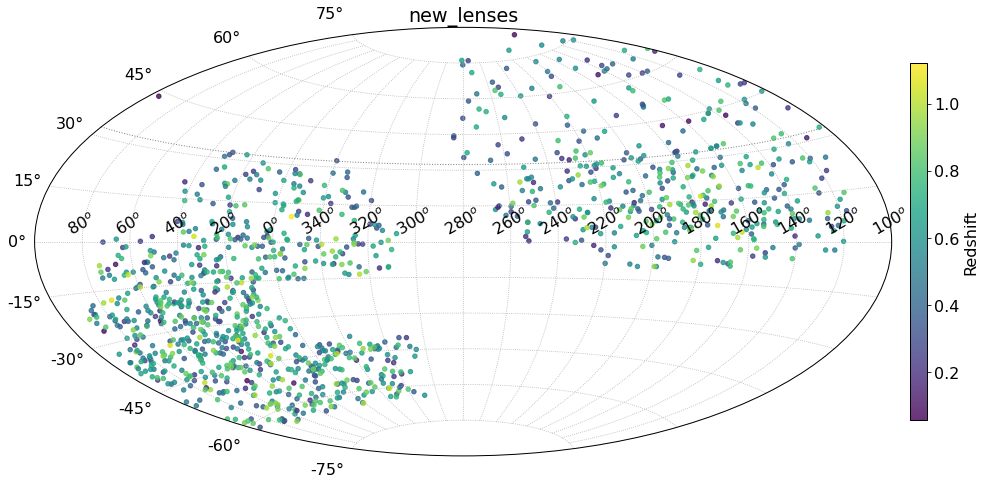

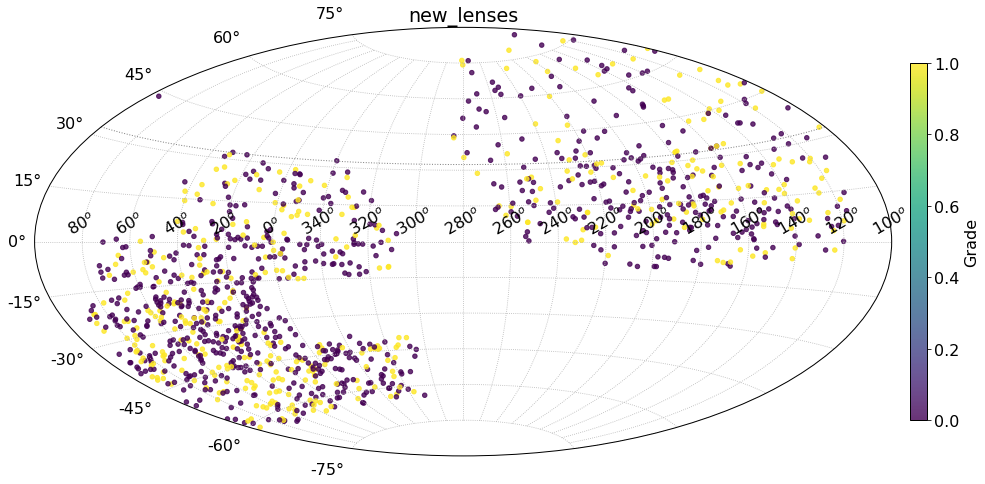

Text(0.5, 1.0, 'new_lenses')

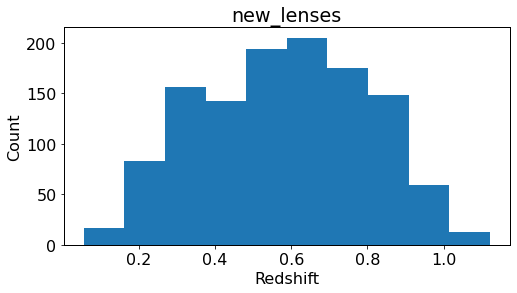

In [4]:
# plot (ra, dec) skymap colored by redshift
plt_tools.plot_skymap(df['ra'], df['dec'], df['z_phot_mean'], field_str='Redshift', title=os.path.splitext(file_in)[0])

# plot (ra, dec) skymap colored by lens grade
g = np.ones(df['grade'].shape[0])
g[df['grade'] == 'B'] = 0                        
plt_tools.plot_skymap(df['ra'], df['dec'], g, field_str='Grade', title=os.path.splitext(file_in)[0])

# Plot histogram of redshift
plt.figure(figsize=(8,4))
plt.hist(df['z_phot_mean'])
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title(os.path.splitext(file_in)[0])


## Load in lens images and plot 

### For this we need the h5py files, which do not fit on github, and must be first downloaded from the link in the README

Keys in the file are:
--------------------
dec: (10000,)
ebv: (10000,)
images: (10000, 3, 152, 152)
inds: (10000,)
is_new_lens: (10000,)
is_previous_lens: (10000,)
mag_g: (10000,)
mag_r: (10000,)
mag_z: (10000,)
nobs_g: (10000,)
nobs_r: (10000,)
nobs_z: (10000,)
prediction: (10000,)
ra: (10000,)
representations: (10000, 2048)
source_type: (10000,)
z_phot_l68: (10000,)
z_phot_mean: (10000,)
z_phot_u68: (10000,)
z_spec: (10000,)


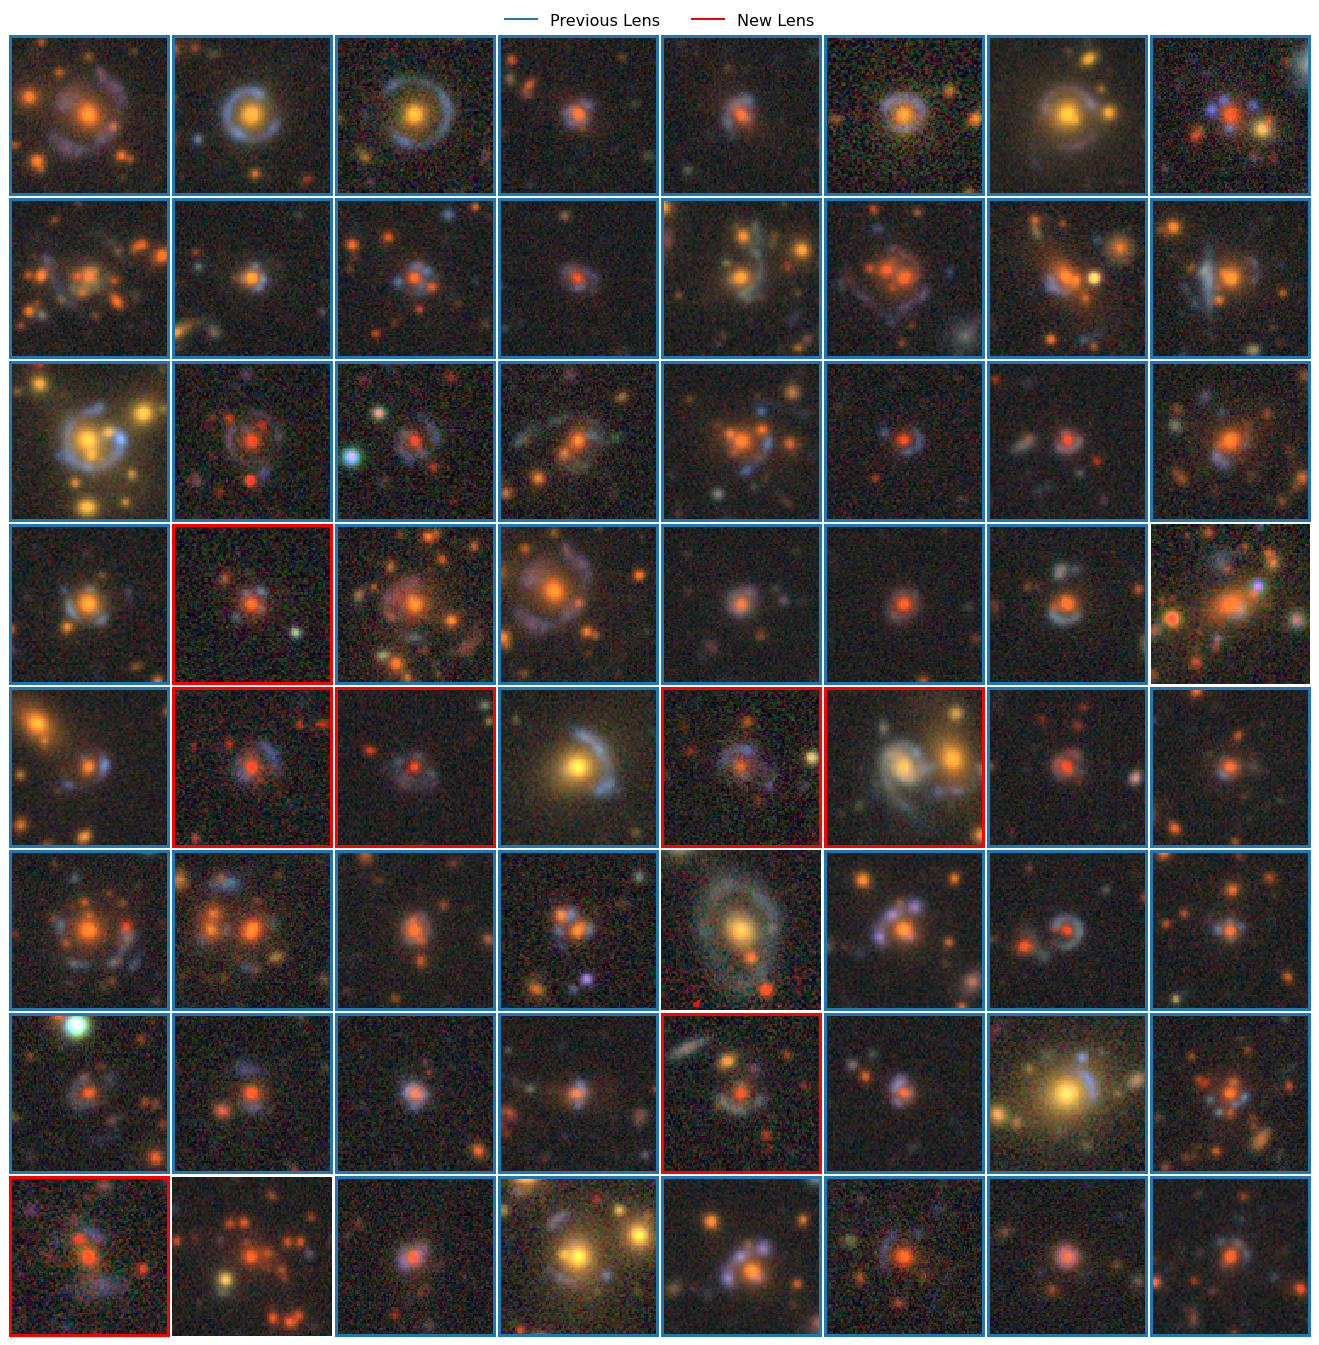

In [6]:
# --- set up plot configuration ---
survey = 'south' # 'south', 'south_mag20-21', 'north'
model = 'linear' # 'linear' or 'finetuned'

istart = 0 # index to start from
nplt = 64 # number of images to plot
nx = 8 # number of columns
npix_show = 96 # number of pixels to show. Models trained on npix=96
label_lenses = True


# --- specify data file and load fields --- 
network_prediction_dir = './data/network_predictions/'
file_in = f'{model}_predictions_{survey}.h5'


with h5py.File(os.path.join(network_prediction_dir, file_in), 'r') as f5:  
    
    print('Keys in the file are:\n'+'-'*20)
    for k in f5.keys():
        print(f'{k}: {f5[k].shape}')

    images = f5['images'][istart:istart+nplt]
    is_previous_lens = f5['is_previous_lens'][istart:istart+nplt]
    is_new_lens = f5['is_new_lens'][istart:istart+nplt]
    prediction = f5['prediction'][istart:istart+nplt]

# --- plot galaxies --- 
plt_tools.show_galaxies(images, 
                        is_previous_lens=is_previous_lens, is_new_lens=is_new_lens, 
                        label_lenses=label_lenses,
                        nx=nx, nplt=nplt, npix_show=npix_show)
